In [1]:
from utils.weighted_ensemble import WeightedEnsemble
import pandas as pd


In [2]:
test = pd.read_csv('../data/data/test.csv')


In [3]:
df1 = pd.read_csv('../Catboost_real_final_df_random_10241630_.csv')
df2 = pd.read_csv('../XGB_real_final_df_random_10241721_.csv')
df3 = pd.read_csv('../ft_transformer_v2_random_1023.csv')
df4 = pd.read_csv('../LGBM_real_final_df_random_10241717_.csv')


In [4]:
# 각각의 결과 추가
test['Catboost'] = df1['deposit']
test['XGB'] = df2['deposit']
test['ft_transformer'] = df3['deposit']
test['LGBM'] = df4['deposit']


In [5]:
weighted_ensemble = WeightedEnsemble()


# 1. 결과 확인

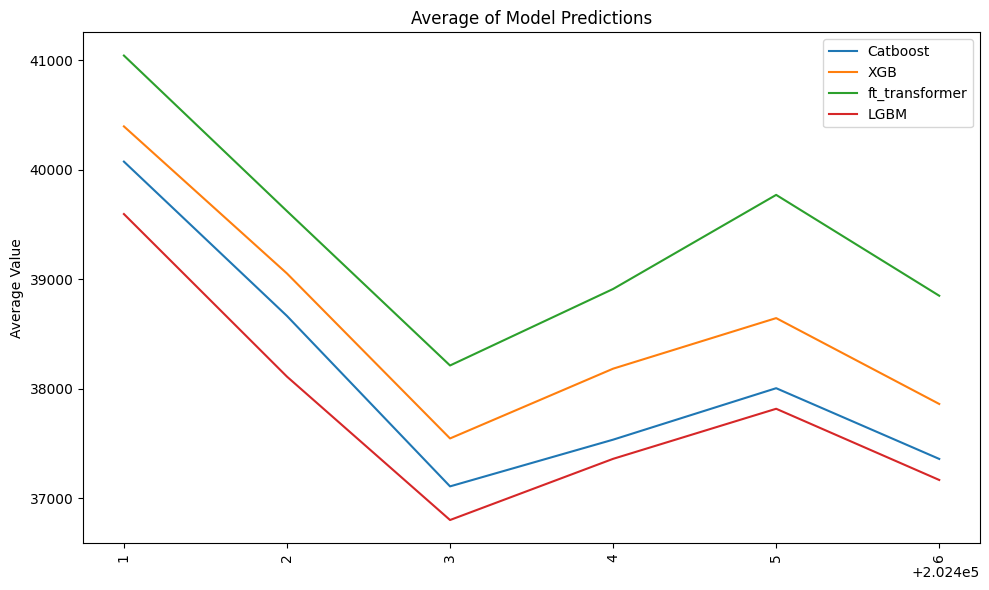

In [6]:
# 연월별 평균
avg_values = test.groupby('contract_year_month')[['Catboost', 'XGB', 'ft_transformer', 'LGBM']].mean()
weighted_ensemble.visualize(avg_values)


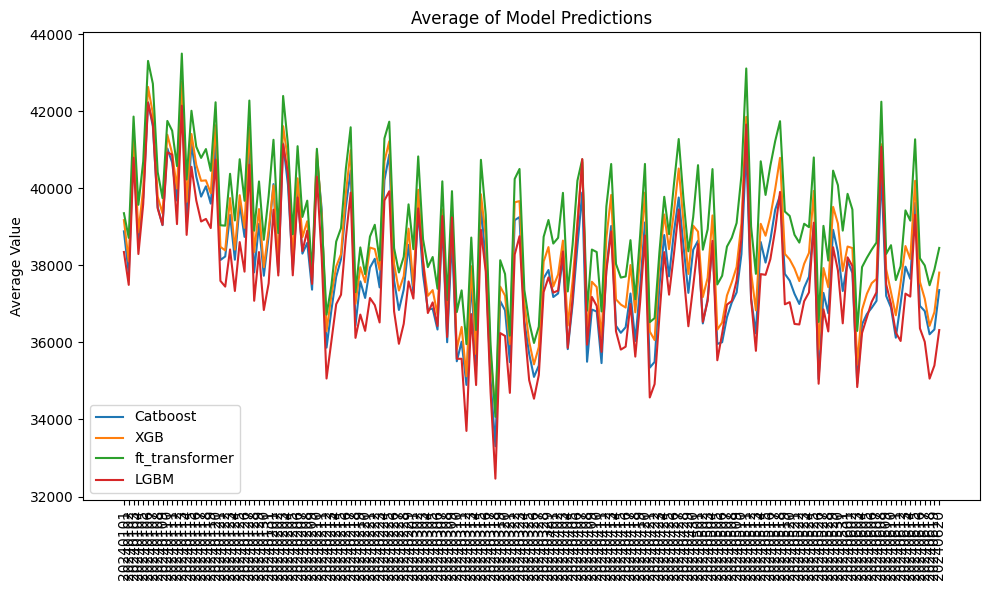

In [7]:
test['contract_year_month_day'] = test['contract_year_month'].astype(str) + test['contract_day'].astype(str).str.zfill(2)
avg_by_day = test.groupby('contract_year_month_day')[['Catboost', 'XGB', 'ft_transformer', 'LGBM']].mean()
weighted_ensemble.visualize(avg_by_day)


# 2. 날짜별 평균 기준

In [9]:
result_df = weighted_ensemble.apply_weights(df = test, weight_type = 'mean')


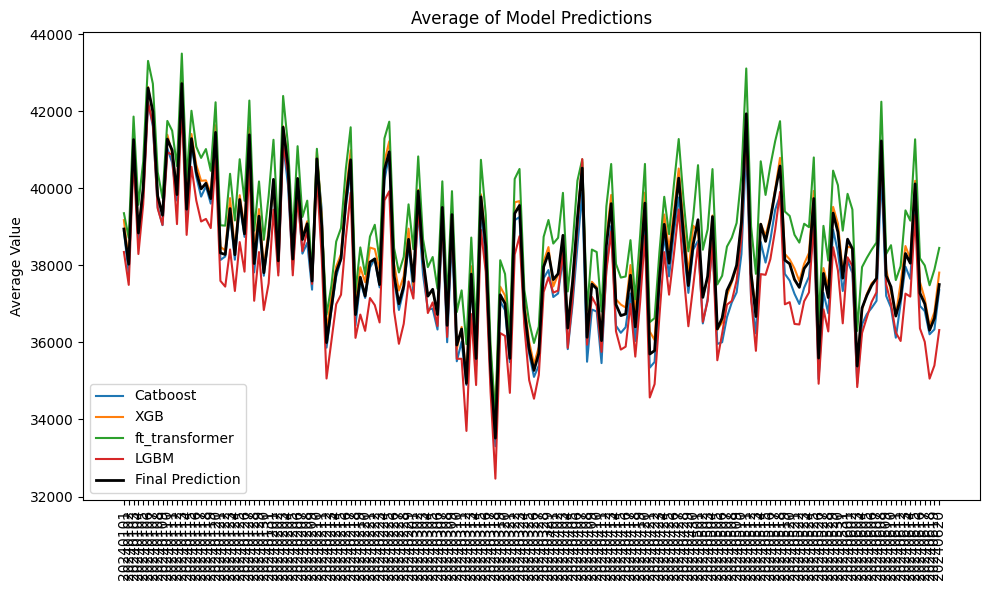

In [15]:
avg_by_day = result_df.groupby('contract_year_month_day')[['Catboost', 'XGB', 'ft_transformer', 'LGBM', 'final_prediction']].mean()
weighted_ensemble.visualize(avg_by_day, show_final_pred=True)


In [10]:
final = result_df[['index', 'final_prediction']].rename(columns={'final_prediction': 'deposit'})
final

,index,deposit
0,0,22050.591732
1,1,7366.849586
2,2,5569.999535
3,3,5998.090966
4,4,6200.736204
...,...,...
150167,150167,38100.288145
150168,150168,42546.942739
150169,150169,44693.628199
150170,150170,37517.770749


In [11]:
final.to_csv('../mean_ensemble.csv')

# 3. 날짜별 표준편차 기준

In [ ]:
result_df = weighted_ensemble.apply_weights(df = test, weight_type = 'std')


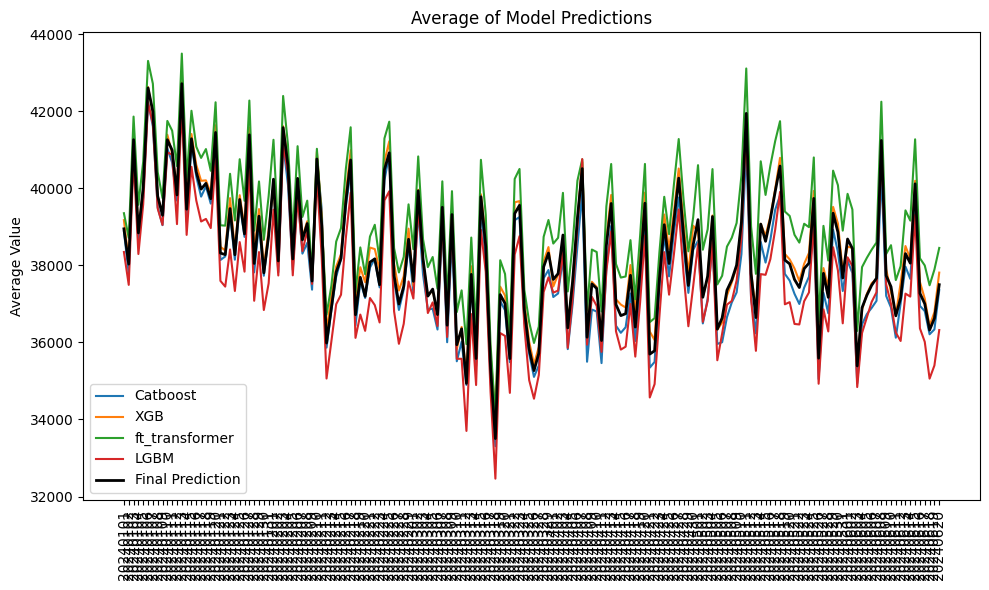

In [17]:
avg_by_day = result_df.groupby('contract_year_month_day')[['Catboost', 'XGB', 'ft_transformer', 'LGBM', 'final_prediction']].mean()
weighted_ensemble.visualize(avg_by_day, show_final_pred=True)


In [14]:
final = result_df[['index', 'final_prediction']].rename(columns={'final_prediction': 'deposit'})
final

,index,deposit
0,0,12319.180926
1,1,3340.192846
2,2,3111.630320
3,3,2974.546425
4,4,2748.705562
...,...,...
150167,150167,21121.589056
150168,150168,20568.928761
150169,150169,19716.375440
150170,150170,18693.889572


In [15]:
final.to_csv('../std_ensemble.csv')